In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from PIL import Image
from math import isclose


def calculate(A):
    m = A.shape[0]
    n = A.shape[1]
    S = np.zeros(n)

    # finding eigenvectors with biggest eigenvalues of A*transpose(A)
    helper = np.matmul(A, np.transpose(A))
    eigenvalues, eigenvectors = la.eigh(helper)
    # descending sort of all the eigenvectors according to their eigenvalues
    index = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[index]
    eigenvectors = eigenvectors[:, index]
    V = eigenvectors

    # S is a diagonal matrix that keeps square root of eigenvalues
    j = 0
    for i in eigenvalues:
        if j == S.size:
            break
        elif i >= 0:
            S[j] = np.sqrt(i)
            j += 1
    # same finding process for transpose(A)*A
    helper = np.matmul(np.transpose(A), A)
    eigenvalues, eigenvectors = la.eigh(helper)
    # descending sort of all the eigenvectors according to their eigenvalues
    index = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[index]
    eigenvectors = eigenvectors[:, index]
    U = np.transpose(eigenvectors)

    # S is a diagonal matrix that keeps square root of eigenvalues
    for i in eigenvalues:
        if j == S.size:
            break
        elif i >= 0:
            S[j] = np.sqrt(i)
            j += 1

    # sorting S in descending order
    S[::-1].sort()
    # print_to_file(S)

    return U, S, V


def plot(Ur, Sr, Vr, Ug, Sg, Vg, Ub, Sb, Vb,img):
    rank = [1, 5, 20, 50]
    for i in rank:
        # calculating V*S*transpose(U) for each channel
        x = Vr[:, 0:i]
        y = Sr[0:i]
        xy = x.dot(np.diag(y))
        z = Ur[0:i]
        merged = xy.dot(z)
        img[:, :, 0] = merged.T

        x = Vg[:, 0:i]
        y = Sg[0:i]
        xy = x.dot(np.diag(y))
        z = Ug[0:i]
        merged = xy.dot(z)
        img[:, :, 1] = merged.T

        x = Vb[:, 0:i]
        y = Sb[0:i]
        xy = x.dot(np.diag(y))
        z = Ub[0:i]
        merged = xy.dot(z)
        img[:, :, 2] = merged.T

        plt.title("Implemented SVD, Rank: %d" % i)
        plt.imshow(img)
        plt.show()


def check_sign_U(U, builtin):
    for i in range(builtin.shape[0]):
        if not isclose(U[i][0], builtin[0][i]):
            U[i] *= -1

    return U


def check_sign_V(V, builtin):
    for i in range(builtin.shape[0]):
        if not isclose(V[0][i], builtin[i][0]):
            V[:, i] *= -1

    return V

def main():
    # read the image and normalize it
    image = np.array(Image.open('data.jpg'))
    image = image / 255
    plt.imshow(image)
    plt.show()

    # Split the image to three channels, Red, Green and Blue
    R = image[:, :, 0]
    G = image[:, :, 1]
    B = image[:, :, 2]

    # Calculate builtin SVD function, it has been used for checking eigenvectors and eigenvalues
    new_img = np.zeros(image.shape)
    Ur, Sr, Vr = la.svd(R, full_matrices=True)
    Ug, Sg, Vg = la.svd(G, full_matrices=True)
    Ub, Sb, Vb = la.svd(B, full_matrices=True)
    # plot_builtin(Ur, Sr, Vr, Ug, Sg, Vg, Ub, Sb, Vb, new_img)


    # Calculate own SVD and plot it for rank = [1,5,20,50]
    new_img2 = np.zeros(image.shape)

    U_r, S_r, V_r = calculate(R.T)
    U_r = check_sign_U(U_r, Ur)
    V_r = check_sign_V(V_r, Vr)

    U_g, S_g, V_g = calculate(G.T)
    U_g = check_sign_U(U_g, Ug)
    V_g = check_sign_V(V_g, Vg)

    U_b, S_b, V_b = calculate(B.T)
    U_b = check_sign_U(U_b, Ub)
    V_b = check_sign_V(V_b, Vb)

    plot(U_r, S_r, V_r, U_g, S_g, V_g, U_b, S_b, V_b, new_img2)


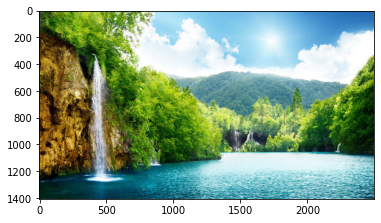

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


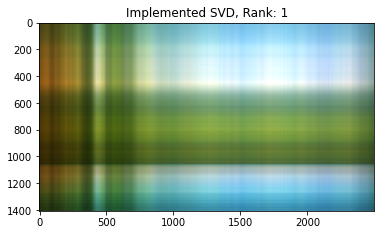

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


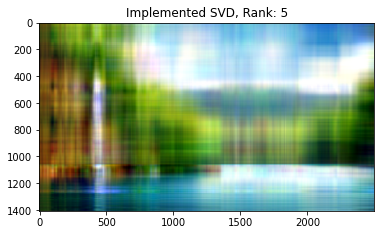

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


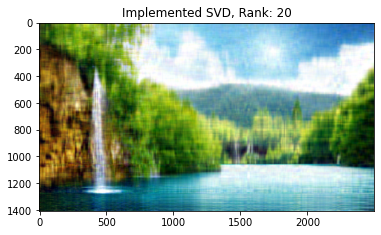

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


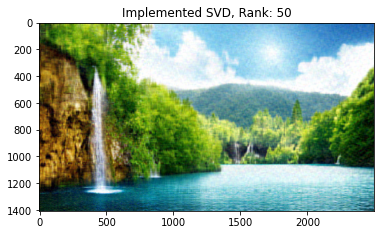

In [2]:
main()